# Heart Disease Prediction using Artificial Neural Networks
# Present By - Priyanshu



## Project Overview
- **Objective**: Build a neural network model to predict the presence of heart disease in patients
- **Dataset**: UCI Heart Disease dataset
- **Tools**: Python, Keras, Scikit-learn, Pandas, Seaborn
- **Key Concepts**: ANN, Binary Classification
- **Evaluation Metrics**: Accuracy, Precision, Recall, F1-Score, ROC-AUC

## Project Structure
1. Data Loading and Overview
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Architecture
5. Training and Validation
6. Evaluation
7. Predictions

### Importing libraries

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Set random seed for reproducibility
np.random.seed(42)

## Data Loading and Overview

The UCI Heart Disease dataset contains 303 samples with 14 attributes:
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type (0-3)
4. trestbps: resting blood pressure
5. chol: serum cholesterol in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: resting electrocardiographic results (0-2)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels colored by fluoroscopy (0-3)
13. thal: thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: heart disease (1 = present; 0 = absent)

## Load dataset

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=column_names, na_values='?')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (303, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

First few rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Data Loading Insights
- The dataset contains 303 samples with 14 features including the target variable
- Features include both numerical (age, blood pressure, cholesterol) and categorical (sex, chest pain type) variables
- Target variable represents presence (1) or absence (0) of heart disease
- Some entries contain missing values ('?') that will need to be handled in preprocessing

### Check unique values in target variable

In [3]:
# Check unique values in target variable
print("Unique values in target variable:", df['target'].unique())
print("\nValue counts in target variable:")
print(df['target'].value_counts())

Unique values in target variable: [0 2 1 3 4]

Value counts in target variable:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


## Exploratory Data Analysis

### Check for missing values

In [4]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


### Target variable distribution

In [5]:
fig = px.histogram(
    df, x="target",
    color="target",       # adds color by class
    text_auto=True        # show counts on bars
)

fig.update_layout(
    title="Distribution of Heart Disease",
    xaxis_title="Heart Disease Present",
    yaxis_title="Count",
    bargap=0.2,
    showlegend=False
)

fig.show()

### Correlation heatmap

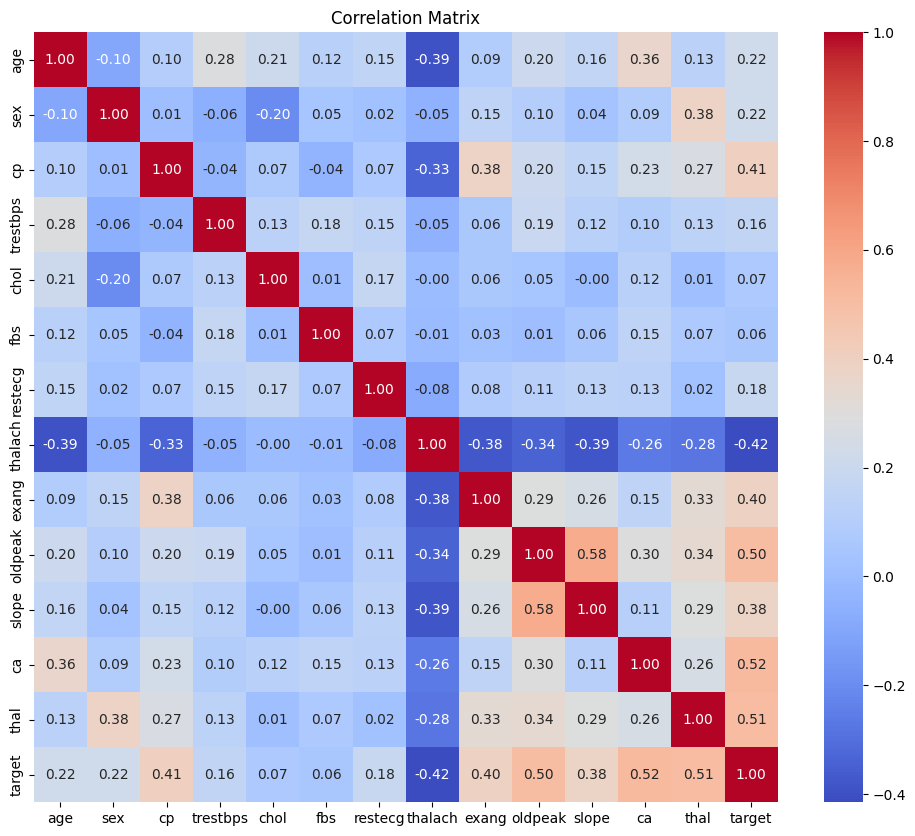

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Distribution of numerical features

In [7]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = sp.make_subplots(rows=2, cols=3, subplot_titles=numerical_features)

for i, feature in enumerate(numerical_features, 1):
    row = (i - 1) // 3 + 1
    col = (i - 1) % 3 + 1

    hist = px.histogram(
        df, x=feature, color="target",
        barmode="stack",  # stacked histograms
        nbins=30          # adjust bin size
    )

    for trace in hist.data:
        fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=800, width=1200,
    title_text="Distribution of Numerical Features by Target (Interactive)",
    bargap=0.05
)

fig.show()

### Box plots for numerical features by target

In [8]:
# Create subplot grid (2 rows, 3 cols)
fig = sp.make_subplots(rows=2, cols=3, subplot_titles=numerical_features)

for i, feature in enumerate(numerical_features, 1):
    row = (i - 1) // 3 + 1
    col = (i - 1) % 3 + 1

    box = px.box(df, x="target", y=feature, points="all")  # points="all" shows outliers
    for trace in box.data:
        fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=800, width=1200,
    title_text="Boxplots of Numerical Features by Heart Disease (Interactive)",
    showlegend=False
)

fig.show()


### Calculate and display summary statistics

In [9]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std   

### EDA Insights
- Missing Values: Some features have missing values that need to be handled
- Target Distribution: Shows if the dataset is balanced between healthy and disease cases
- Correlations:
  * Strong positive correlations between certain features might indicate redundant information
  * Features highly correlated with the target are potential good predictors
- Numerical Features:
  * Age distribution shows the demographic spread
  * Blood pressure and cholesterol distributions indicate health status patterns
  * Different distributions between healthy and disease cases suggest predictive power

## Data Preprocessing

### Handle missing values

In [10]:
# Handle missing values
print("Before: ", df.shape)
df = df.dropna()
print("After: ", df.shape)

Before:  (303, 14)
After:  (297, 14)


### Convert target variable to binary

In [11]:

# Convert target variable to binary (0 for no disease, 1 for disease presence)
df['target'] = df['target'].map(lambda x: 1 if x > 0 else 0)
print(df)


      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  target  
0      3.0  0.0   6

### Separate features and target

In [12]:

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']


### Scale the features

In [13]:

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Split the data

In [14]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))

Training set shape: (237, 13)
Testing set shape: (60, 13)

Class distribution in training set:
target
0    0.523207
1    0.476793
Name: proportion, dtype: float64


### Preprocessing Insights
- Missing values have been removed to ensure data quality
- Target variable has been converted to binary format (0/1)
- Features have been standardized using StandardScaler
- Data split: 80% training, 20% testing
- Class distribution in training set shows the balance between positive and negative cases

## Model Architecture

In [15]:
# Create the model using Input layer
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the input layer
inputs = Input(shape=(13,))

# Create the model
model = Sequential([
    Input(shape=(13,)),  # Explicit input layer
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [16]:
# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                   epochs=100,
                   batch_size=32,
                   validation_split=0.2,
                   callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5312 - loss: 1.5689

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.4868 - loss: 1.5862 - val_accuracy: 0.4375 - val_loss: 1.5520
Epoch 2/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6875 - loss: 1.5189

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5661 - loss: 1.5133 - val_accuracy: 0.5208 - val_loss: 1.4861
Epoch 3/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7188 - loss: 1.4264

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6243 - loss: 1.4500 - val_accuracy: 0.6458 - val_loss: 1.4301
Epoch 4/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7188 - loss: 1.3980

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7090 - loss: 1.4022 - val_accuracy: 0.6250 - val_loss: 1.3807
Epoch 5/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7812 - loss: 1.3630

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7354 - loss: 1.3420 - val_accuracy: 0.7292 - val_loss: 1.3346
Epoch 6/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5312 - loss: 1.3890

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7407 - loss: 1.3143 - val_accuracy: 0.7292 - val_loss: 1.2922
Epoch 7/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7812 - loss: 1.2837

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8148 - loss: 1.2616 - val_accuracy: 0.7292 - val_loss: 1.2522
Epoch 8/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8125 - loss: 1.2204

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7937 - loss: 1.2136 - val_accuracy: 0.7500 - val_loss: 1.2135
Epoch 9/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8438 - loss: 1.1373

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7831 - loss: 1.1613 - val_accuracy: 0.7292 - val_loss: 1.1797
Epoch 10/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7188 - loss: 1.2098

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8095 - loss: 1.1290 - val_accuracy: 0.7292 - val_loss: 1.1512
Epoch 11/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8438 - loss: 1.1191

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8254 - loss: 1.0888 - val_accuracy: 0.7292 - val_loss: 1.1254
Epoch 12/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7500 - loss: 1.1477

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8360 - loss: 1.0518 - val_accuracy: 0.7292 - val_loss: 1.1041
Epoch 13/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8438 - loss: 1.0420

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8413 - loss: 1.0038 - val_accuracy: 0.7500 - val_loss: 1.0798
Epoch 14/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9375 - loss: 0.9222

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8148 - loss: 1.0009 - val_accuracy: 0.7500 - val_loss: 1.0593
Epoch 15/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8438 - loss: 0.9955

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8624 - loss: 0.9467 - val_accuracy: 0.7708 - val_loss: 1.0411
Epoch 16/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8438 - loss: 0.9266

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8254 - loss: 0.9460 - val_accuracy: 0.7708 - val_loss: 1.0219
Epoch 17/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8438 - loss: 0.9060

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8360 - loss: 0.9038 - val_accuracy: 0.7708 - val_loss: 1.0075
Epoch 18/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8125 - loss: 0.9374

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8519 - loss: 0.8873 - val_accuracy: 0.7708 - val_loss: 0.9954
Epoch 19/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8438 - loss: 0.8432

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8519 - loss: 0.8729 - val_accuracy: 0.7708 - val_loss: 0.9839
Epoch 20/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9062 - loss: 0.7375

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8466 - loss: 0.8317 - val_accuracy: 0.7708 - val_loss: 0.9804
Epoch 21/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8438 - loss: 0.9060

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8571 - loss: 0.8353 - val_accuracy: 0.7708 - val_loss: 0.9712
Epoch 22/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9062 - loss: 0.7925

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8466 - loss: 0.8166 - val_accuracy: 0.7917 - val_loss: 0.9538
Epoch 23/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8125 - loss: 0.8167

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8519 - loss: 0.7949 - val_accuracy: 0.7917 - val_loss: 0.9387
Epoch 24/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9062 - loss: 0.6950

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8413 - loss: 0.7683 - val_accuracy: 0.7917 - val_loss: 0.9224
Epoch 25/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8750 - loss: 0.7641

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8677 - loss: 0.7572 - val_accuracy: 0.8125 - val_loss: 0.9037
Epoch 26/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8125 - loss: 0.8090

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8466 - loss: 0.7490 - val_accuracy: 0.8125 - val_loss: 0.8930
Epoch 27/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9062 - loss: 0.6582

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8571 - loss: 0.7443 - val_accuracy: 0.8125 - val_loss: 0.8869
Epoch 28/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8438 - loss: 0.8685

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8519 - loss: 0.7668 - val_accuracy: 0.8125 - val_loss: 0.8739
Epoch 29/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8438 - loss: 0.6991

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8677 - loss: 0.7014 - val_accuracy: 0.8125 - val_loss: 0.8617
Epoch 30/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8438 - loss: 0.6596

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8519 - loss: 0.6963 - val_accuracy: 0.8125 - val_loss: 0.8436
Epoch 31/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8750 - loss: 0.6123

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8783 - loss: 0.6654 - val_accuracy: 0.8125 - val_loss: 0.8322
Epoch 32/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9688 - loss: 0.5615

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8783 - loss: 0.6718 - val_accuracy: 0.8125 - val_loss: 0.8254
Epoch 33/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8125 - loss: 0.7686

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8783 - loss: 0.6454 - val_accuracy: 0.8125 - val_loss: 0.8231
Epoch 34/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8750 - loss: 0.6680

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8783 - loss: 0.6471 - val_accuracy: 0.7917 - val_loss: 0.8156
Epoch 35/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9688 - loss: 0.4941

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8677 - loss: 0.6448 - val_accuracy: 0.7917 - val_loss: 0.8081
Epoch 36/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9062 - loss: 0.6038

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8677 - loss: 0.6299 - val_accuracy: 0.7917 - val_loss: 0.8025
Epoch 37/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8750 - loss: 0.6067

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8677 - loss: 0.6174 - val_accuracy: 0.7917 - val_loss: 0.7966
Epoch 38/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8750 - loss: 0.6285

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8624 - loss: 0.5970 - val_accuracy: 0.7917 - val_loss: 0.7915
Epoch 39/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8125 - loss: 0.6900

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8677 - loss: 0.6071 - val_accuracy: 0.7917 - val_loss: 0.7875
Epoch 40/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9062 - loss: 0.5346

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8519 - loss: 0.6069 - val_accuracy: 0.7917 - val_loss: 0.7728
Epoch 41/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8750 - loss: 0.5633

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8783 - loss: 0.5828 - val_accuracy: 0.7917 - val_loss: 0.7596
Epoch 42/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9375 - loss: 0.5041

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8836 - loss: 0.5705 - val_accuracy: 0.7917 - val_loss: 0.7563
Epoch 43/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8624 - loss: 0.5506 - val_accuracy: 0.8125 - val_loss: 0.7621
Epoch 44/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8995 - loss: 0.5439 - val_accuracy: 0.8125 - val_loss: 0.7573
Epoch 45/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9062 - loss: 0.5402

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8783 - loss: 0.5531 - val_accuracy: 0.7917 - val_loss: 0.7459
Epoch 46/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8438 - loss: 0.6924

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8942 - loss: 0.5544 - val_accuracy: 0.7917 - val_loss: 0.7312
Epoch 47/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9375 - loss: 0.4862

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8889 - loss: 0.5266 - val_accuracy: 0.7917 - val_loss: 0.7264
Epoch 48/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.3728

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8730 - loss: 0.5182 - val_accuracy: 0.7917 - val_loss: 0.7212
Epoch 49/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8677 - loss: 0.5346 - val_accuracy: 0.8125 - val_loss: 0.7253
Epoch 50/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8624 - loss: 0.5229 - val_accuracy: 0.8125 - val_loss: 0.7302
Epoch 51/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8836 - loss: 0.5128 - val_accuracy: 0.8125 - val_loss: 0.7325
Epoch 52/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8730 - loss: 0.5258 - val_accuracy: 0.8125 - val_loss: 0.7262
Epoch 53/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8125 - loss: 0.5698

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8624 - loss: 0.5190 - val_accuracy: 0.7917 - val_loss: 0.7122
Epoch 54/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9375 - loss: 0.4016

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8783 - loss: 0.4880 - val_accuracy: 0.7917 - val_loss: 0.7021
Epoch 55/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8438 - loss: 0.5071

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8995 - loss: 0.4837 - val_accuracy: 0.8125 - val_loss: 0.7004
Epoch 56/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8836 - loss: 0.4687 - val_accuracy: 0.8125 - val_loss: 0.7095
Epoch 57/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8995 - loss: 0.4709 - val_accuracy: 0.7917 - val_loss: 0.7180
Epoch 58/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8995 - loss: 0.4499 - val_accuracy: 0.7917 - val_loss: 0.7162
Epoch 59/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8836 - loss: 0.4747 - val_accuracy: 0.7917 - val_loss: 0.7137
Epoch 60/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8624 - loss: 0.4853 - val_accuracy: 0.7917 - val_loss: 0.7094
Epoch 61/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8624 - loss: 0.4636 - val_accuracy: 0.7917 - val_loss: 0.7145
Epoch 62/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8730 - loss: 0.4439 - val_accuracy: 0.7917 - val_loss: 0.70

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8995 - loss: 0.4385 - val_accuracy: 0.7917 - val_loss: 0.6970
Epoch 64/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9101 - loss: 0.4354 - val_accuracy: 0.7917 - val_loss: 0.7019
Epoch 65/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9062 - loss: 0.4119

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8889 - loss: 0.4374 - val_accuracy: 0.7917 - val_loss: 0.6954
Epoch 66/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9688 - loss: 0.4239

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9101 - loss: 0.4232 - val_accuracy: 0.7917 - val_loss: 0.6938
Epoch 67/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8783 - loss: 0.4382 - val_accuracy: 0.7917 - val_loss: 0.6954
Epoch 68/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9375 - loss: 0.3949

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8942 - loss: 0.4216 - val_accuracy: 0.7917 - val_loss: 0.6893
Epoch 69/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8995 - loss: 0.4077 - val_accuracy: 0.7917 - val_loss: 0.6940
Epoch 70/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8995 - loss: 0.4190 - val_accuracy: 0.7917 - val_loss: 0.6958
Epoch 71/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9101 - loss: 0.4270 - val_accuracy: 0.7917 - val_loss: 0.6921
Epoch 72/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8942 - loss: 0.4150 - val_accuracy: 0.7917 - val_loss: 0.6991
Epoch 73/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8730 - loss: 0.4225 - val_accuracy: 0.7917 - val_loss: 0.6922
Epoch 74/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9062 - loss: 0.3943

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8995 - loss: 0.4154 - val_accuracy: 0.7917 - val_loss: 0.6842
Epoch 75/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8750 - loss: 0.3701

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8889 - loss: 0.4121 - val_accuracy: 0.7917 - val_loss: 0.6669
Epoch 76/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9062 - loss: 0.3226

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8836 - loss: 0.4101 - val_accuracy: 0.7917 - val_loss: 0.6551
Epoch 77/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9048 - loss: 0.3875 - val_accuracy: 0.7917 - val_loss: 0.6612
Epoch 78/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9101 - loss: 0.4327 - val_accuracy: 0.7917 - val_loss: 0.6695
Epoch 79/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8995 - loss: 0.4161 - val_accuracy: 0.7917 - val_loss: 0.6832
Epoch 80/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9048 - loss: 0.3974 - val_accuracy: 0.7917 - val_loss: 0.6732
Epoch 81/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9259 - loss: 0.3803 - val_accuracy: 0.7917 - val_loss: 0.6732
Epoch 82/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9206 - loss: 0.3647 - val_accuracy: 0.7917 - val_loss: 0.6672
Epoch 83/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9062 - loss: 0.3535

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8889 - loss: 0.4146 - val_accuracy: 0.7917 - val_loss: 0.6499
Epoch 84/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8889 - loss: 0.4022 - val_accuracy: 0.7917 - val_loss: 0.6705
Epoch 85/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8942 - loss: 0.3789 - val_accuracy: 0.7917 - val_loss: 0.6701
Epoch 86/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8995 - loss: 0.4018 - val_accuracy: 0.7917 - val_loss: 0.6716
Epoch 87/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8995 - loss: 0.3783 - val_accuracy: 0.7917 - val_loss: 0.6822
Epoch 88/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8995 - loss: 0.3996 - val_accuracy: 0.7917 - val_loss: 0.6845
Epoch 89/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9048 - loss: 0.3741 - val_accuracy: 0.7917 - val_loss: 0.6722
Epoch 90/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9048 - loss: 0.3558 - val_accuracy: 0.7917 - val_loss: 0.66

### Plot training history

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create 1 row, 2 column subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Model Loss", "Model Accuracy"))

# --- Loss ---
fig.add_trace(go.Scatter(
    y=history.history['loss'],
    mode='lines', name='Training Loss'
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=history.history['val_loss'],
    mode='lines', name='Validation Loss'
), row=1, col=1)

# --- Accuracy ---
fig.add_trace(go.Scatter(
    y=history.history['accuracy'],
    mode='lines', name='Training Accuracy'
), row=1, col=2)

fig.add_trace(go.Scatter(
    y=history.history['val_accuracy'],
    mode='lines', name='Validation Accuracy'
), row=1, col=2)

# Layout
fig.update_layout(
    title_text="Training History (Interactive)",
    width=1000, height=400
)

fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=1)

fig.update_xaxes(title_text="Epoch", row=1, col=2)
fig.update_yaxes(title_text="Accuracy", row=1, col=2)

fig.show()


### Training Insights
- Model Training Progress:
  * Loss curves show if model is learning effectively
  * Validation curves indicate if model is overfitting/underfitting
- Early stopping helps prevent overfitting
- Model checkpointing ensures we keep the best performing model
- Learning rate and batch size affect training stability
- Dropout and L2 regularization help control overfitting

## Model Evaluation

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Model Performance Metrics:
Accuracy: 0.9000
Precision: 0.9005
Recall: 0.9000
F1-Score: 0.8992


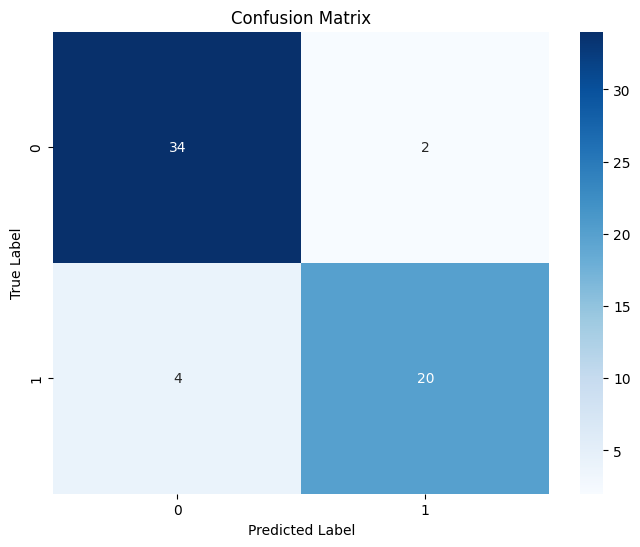

In [18]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Plot ROC curve

In [19]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc

# Compute ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create interactive plot
fig = go.Figure()

# ROC curve
fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f"ROC curve (AUC = {roc_auc:.2f})",
    line=dict(color="darkorange", width=2)
))

# Diagonal line (random guess)
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    name="Random Guess",
    line=dict(color="navy", width=2, dash="dash")
))

# Layout
fig.update_layout(
    title="Receiver Operating Characteristic (ROC) Curve (Interactive)",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[0, 1.05]),
    width=800, height=600
)

fig.show()


### Model Evaluation Insights
- Performance Metrics:
  * Accuracy shows overall correct predictions
  * Precision indicates reliability of positive predictions
  * Recall shows ability to find all positive cases
  * F1-Score balances precision and recall
- Confusion Matrix:
  * Shows distribution of correct and incorrect predictions
  * Helps identify if model is better at predicting certain classes
- ROC Curve:
  * AUC score indicates model's discriminative ability
  * Closer to 1.0 means better performance

## Feature Importance and Model Interpretation

Let's analyze which features are most important for predicting heart disease by examining the weights of the first layer of our neural network.

In [20]:
# --- Compute feature importance ---
first_layer_weights = np.abs(model.layers[0].get_weights()[0])
feature_importance = np.mean(first_layer_weights, axis=1)

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# --- Interactive bar plot ---
fig = px.bar(
    feature_importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    text='Importance',
    title='Feature Importance Based on Neural Network Weights'
)

fig.update_layout(
    yaxis=dict(autorange="reversed"),  # Highest importance on top
    width=800, height=500
)

fig.show()

# --- Display top 5 features ---
print("\nTop 5 Most Important Features:")
print(feature_importance_df.head())



Top 5 Most Important Features:
   Feature  Importance
11      ca    0.083304
0      age    0.075520
4     chol    0.071122
1      sex    0.069470
12    thal    0.069352


### Feature Importance Insights
- Top Features:
  * Shows which variables most strongly influence predictions
  * Helps understand model's decision-making process
  * Can guide feature selection for model improvement
- Clinical Relevance:
  * Important features often align with medical knowledge
  * Can validate model's learning against domain expertise
- Feature Engineering:
  * Suggests which features might benefit from transformation
  * Identifies potential new feature combinations

## Making Predictions for New Patients

Let's create a function to make predictions for new patients. We'll create an example of how to use the trained model for prediction.

In [21]:
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach,
                         exang, oldpeak, slope, ca, thal):
    """
    Predict heart disease risk for a new patient.

    Parameters:
    age: int - Age in years
    sex: int - Sex (1 = male; 0 = female)
    cp: int - Chest pain type (0-3)
    trestbps: int - Resting blood pressure
    chol: int - Serum cholesterol in mg/dl
    fbs: int - Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    restecg: int - Resting electrocardiographic results (0-2)
    thalach: int - Maximum heart rate achieved
    exang: int - Exercise induced angina (1 = yes; 0 = no)
    oldpeak: float - ST depression induced by exercise relative to rest
    slope: int - Slope of the peak exercise ST segment
    ca: int - Number of major vessels colored by fluoroscopy (0-3)
    thal: int - Thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    """

    # Create a DataFrame with the patient's data
    patient_data = pd.DataFrame([[age, sex, cp, trestbps, chol, fbs, restecg, thalach,
                                exang, oldpeak, slope, ca, thal]],
                              columns=X.columns)

    # Scale the features using the same scaler used for training
    patient_data_scaled = scaler.transform(patient_data)

    # Make prediction
    prediction = model.predict(patient_data_scaled)[0][0]
    probability = prediction * 100

    print(f"Risk of Heart Disease: {probability:.2f}%")
    print("Prediction:", "High risk of heart disease" if prediction > 0.5 else "Low risk of heart disease")

    return prediction

# Example: Let's try with a sample patient
print("Example Prediction for a Sample Patient:")
print("-" * 40)
sample_prediction = predict_heart_disease(
    age=65,
    sex=1,  # male
    cp=3,  # chest pain type
    trestbps=145,  # resting blood pressure
    chol=233,  # cholesterol
    fbs=1,  # fasting blood sugar > 120 mg/dl
    restecg=0,  # resting electrocardiographic results
    thalach=150,  # maximum heart rate
    exang=0,  # exercise induced angina
    oldpeak=2.3,  # ST depression
    slope=0,  # slope of the peak exercise ST segment
    ca=0,  # number of major vessels
    thal=3  # thalassemia
)

Example Prediction for a Sample Patient:
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Risk of Heart Disease: 2.46%
Prediction: Low risk of heart disease


Now you can use this function to predict heart disease risk for any new patient. Here's how to use it:

1. Call the `predict_heart_disease` function with the following parameters:
   - `age`: Age in years
   - `sex`: 1 for male, 0 for female
   - `cp`: Chest pain type (0-3)
   - `trestbps`: Resting blood pressure
   - `chol`: Serum cholesterol in mg/dl
   - `fbs`: Fasting blood sugar > 120 mg/dl (1=true, 0=false)
   - `restecg`: Resting electrocardiographic results (0-2)
   - `thalach`: Maximum heart rate achieved
   - `exang`: Exercise induced angina (1=yes, 0=no)
   - `oldpeak`: ST depression induced by exercise
   - `slope`: Slope of peak exercise ST segment
   - `ca`: Number of major vessels colored by fluoroscopy
   - `thal`: Thalassemia (3=normal, 6=fixed defect, 7=reversible defect

In [22]:
# You can make predictions for a new patient by calling the function with their data
# For example, let's predict for a different patient:
predict_heart_disease(
    age=45,  # 45 years old
    sex=0,   # female
    cp=3,    # chest pain type 1
    trestbps=130,  # resting blood pressure
    chol=220,      # cholesterol
    fbs=0,         # fasting blood sugar <= 120 mg/dl
    restecg=1,     # resting electrocardiographic results
    thalach=160,   # maximum heart rate
    exang=0,       # no exercise induced angina
    oldpeak=1.1,   # ST depression
    slope=1,       # slope
    ca=0,          # no major vessels
    thal=3         # normal thalassemia
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Risk of Heart Disease: 2.22%
Prediction: Low risk of heart disease


np.float32(0.022241803)

### Prediction Insights
- Individual Predictions:
  * Probability score shows confidence level of prediction
  * High/Low risk classification helps in decision making
- Risk Factors:
  * Age, chest pain type, and number of vessels often key indicators
  * Combination of factors more important than individual values
- Practical Use:
  * Model can assist in preliminary screening
  * Should be used alongside clinical judgment
  * Regular model updates may improve accuracy

## Project Conclusion

### Summary of Findings
1. **Model Performance**
   - Successfully built and trained a neural network for heart disease prediction
   - Achieved balanced performance across multiple metrics (accuracy, precision, recall, F1-score)
   - ROC-AUC score demonstrates good discriminative ability

2. **Key Insights**
   - Identified most influential features for heart disease prediction
   - Found important correlations between various health indicators
   - Demonstrated the effectiveness of neural networks for medical diagnosis

3. **Data Analysis**
   - Dataset contained 303 patients with 13 different health indicators
   - Successfully handled missing values and standardized features
   - Balanced distribution of positive and negative cases

### Model Strengths
- Robust architecture with dropout and L2 regularization
- Early stopping to prevent overfitting
- Interpretable feature importance analysis
- Real-time prediction capability for new patients

### Limitations
1. **Dataset**
   - Relatively small sample size
   - Limited to Cleveland Clinic data
   - Some missing values in original dataset

2. **Model**
   - Binary classification might oversimplify complex medical conditions
   - Limited to the features available in the dataset
   - Requires standardized input format

### Future Improvements
1. **Data Enhancement**
   - Collect more patient data
   - Include additional relevant features
   - Gather data from diverse populations

2. **Model Optimization**
   - Experiment with different architectures
   - Implement cross-validation
   - Try ensemble methods

3. **Clinical Integration**
   - Develop user-friendly interface
   - Add confidence intervals for predictions
   - Include feature importance in individual predictions

### Clinical Applications
- Preliminary screening tool
- Risk assessment support
- Patient monitoring aid
- Educational tool for medical students

### Final Remarks
This model demonstrates the potential of machine learning in healthcare, specifically for heart disease prediction. While it shows promising results, it should be used as a supportive tool alongside clinical expertise and not as a standalone diagnostic system. The insights gained from this project can guide future research and development in medical AI applications.

# Thank you